# Counting analysis

In [252]:
import glob, re, getpass, collections, operator, scipy.stats, sklearn.metrics
from itertools import chain
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr 
from functions.bhsa import get_data, unique, lbh_books, sbh_books # <- here's the new data data load statement -CK

In [209]:
all_data = get_data()

## Phrase function

In [2]:
data = all_data['phrase_functions']
unique_functions = unique(otype='phrase', feature='function') 

Counting phrase functions

In [10]:
phrase_function_count = dict() # Looking at all functions

for bookname, clauses in data.items():
    phrase_function_count[bookname] = collections.Counter(list(chain(*clauses))) 

df_Count = pd.DataFrame(phrase_function_count, columns=data.keys()).fillna(0)
# Normalize the dataframes. This means that we divide all frequencies by the sum of the frequencies. 
df_prob_Count = df_Count.div(df_Count.sum(axis=0), axis=1)

In [103]:
df_Count #[list(lbh_books)] # or sbh_books

,Genesis,sbh,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Samuel,2_Samuel,1_Kings,2_Kings,Esther,lbh,Ezra,Nehemiah,1_Chronicles,2_Chronicles
Adju,173.0,1136,168.0,19.0,59.0,115.0,99.0,76.0,103.0,169.0,155.0,60.0,842,79.0,84.0,243.0,376.0
Cmpl,1252.0,6877,563.0,155.0,222.0,665.0,805.0,899.0,746.0,752.0,818.0,211.0,1895,109.0,288.0,416.0,871.0
Conj,2621.0,12890,1211.0,219.0,338.0,988.0,1426.0,1778.0,1388.0,1422.0,1499.0,288.0,3407,189.0,525.0,837.0,1568.0
Exst,4.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1.0,3.0,0.0,0.0
Frnt,14.0,100,12.0,0.0,0.0,10.0,5.0,9.0,9.0,28.0,13.0,1.0,37,2.0,2.0,10.0,22.0
IntS,1.0,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,12,0.0,0.0,2.0,10.0
Intj,42.0,141,12.0,1.0,2.0,3.0,18.0,20.0,12.0,15.0,16.0,0.0,7,0.0,1.0,0.0,6.0
Loca,120.0,663,122.0,8.0,25.0,55.0,57.0,61.0,56.0,79.0,80.0,11.0,214,17.0,53.0,41.0,92.0
ModS,4.0,11,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,1,0.0,0.0,0.0,0.0
Modi,86.0,408,52.0,8.0,9.0,36.0,37.0,49.0,51.0,45.0,35.0,8.0,98,7.0,19.0,24.0,40.0


As can be seen in the upper table, there are a lot of values < 5. Therefore, we cannot perform a chi-square test to compare the frequencies of phrase functions. 

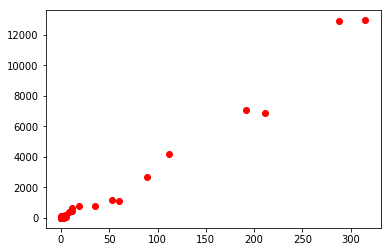

In [188]:
plt.plot(df_Count["Esther"].values,df_Count["sbh"].values, 'ro')
plt.show()

In [309]:
def linear_model_count(df, books):
    n = len(books)
    np_empty=np.zeros((n, n))
    df_MSE = pd.DataFrame(np_empty, columns = books, index = books)
    df_Score = pd.DataFrame(np_empty, columns = books, index = books)
    
    plt.close('all')
    
    f, axarr = plt.subplots(n, n,figsize=(25,25))
    for indexi,i in enumerate(books):
        for indexj,j in enumerate(books):
        
            x = np.matrix(df[i].values).transpose()
            y = np.array(df[j].values)
        
            regr = linear_model.LinearRegression(fit_intercept = True)
            regr.fit(x,y)
            df_Score.loc[i,j] = 1-regr.score(x,y)
        
            y_pred = regr.predict(x)
            df_MSE.loc[i,j] = round(mean_squared_error(y_pred, y),2)
            
            if(indexj<indexi):
                axarr[indexj, indexi].plot(x,y, 'ro')
                axarr[indexj, indexi].plot(x, y_pred, color='blue', linewidth=3)
                axarr[indexj, indexi].axes.xaxis.set_ticklabels([])
                axarr[indexj, indexi].axes.yaxis.set_ticklabels([])
            elif(indexj==indexi):
                axarr[indexj, indexi].plot(x,y, 'ro')
                axarr[indexj, indexi].plot(x, y_pred, color='blue', linewidth=3)
                axarr[indexj, indexi].axes.xaxis.set_ticklabels([])
                axarr[indexj, indexi].axes.yaxis.set_ticklabels([])
                axarr[indexj, indexi].set_xlabel(i,fontsize=18)
                axarr[indexj, indexi].set_ylabel(j,fontsize=18)
            else:
                axarr[indexj, indexi].axis('off')
    plt.show()
    return df_MSE,df_Score
  

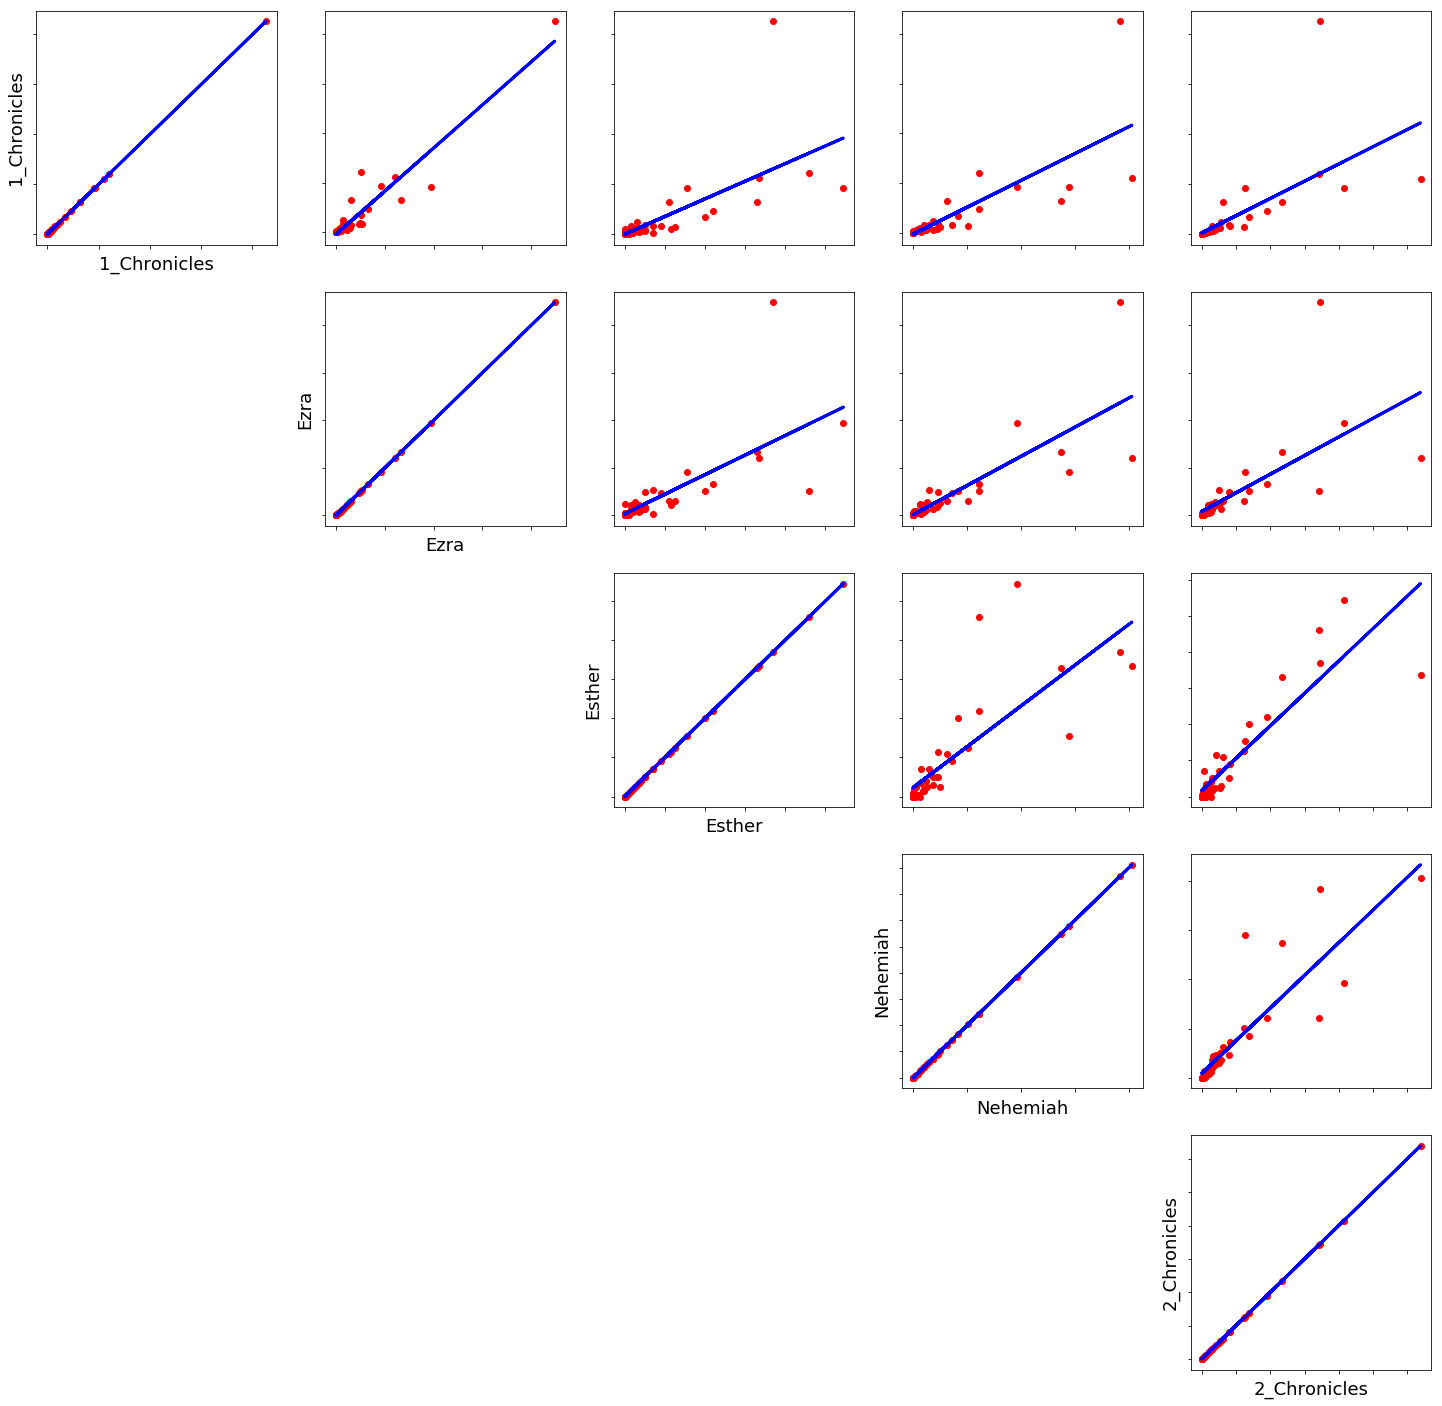

In [311]:
a,b = linear_model_count(df_Count[list(lbh_books)],list(lbh_books))

,Genesis,sbh,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Samuel,2_Samuel,1_Kings,2_Kings,Esther,lbh,Ezra,Nehemiah,1_Chronicles,2_Chronicles
AjCl,82.0,551.0,38.0,67.0,73.0,13.0,45.0,68.0,60.0,57.0,48.0,23.0,117.0,11.0,23.0,19.0,41.0
CPen,94.0,549.0,46.0,133.0,55.0,33.0,23.0,30.0,33.0,55.0,47.0,5.0,89.0,14.0,13.0,18.0,39.0
Ellp,118.0,818.0,190.0,69.0,95.0,84.0,31.0,38.0,70.0,78.0,45.0,31.0,533.0,46.0,145.0,185.0,126.0
InfA,3.0,66.0,7.0,3.0,16.0,12.0,2.0,10.0,3.0,2.0,8.0,14.0,33.0,1.0,7.0,4.0,7.0
InfC,435.0,3035.0,341.0,196.0,451.0,209.0,222.0,330.0,274.0,318.0,259.0,109.0,900.0,97.0,96.0,183.0,415.0
MSyn,33.0,280.0,32.0,3.0,29.0,19.0,26.0,47.0,30.0,29.0,32.0,0.0,64.0,12.0,6.0,19.0,27.0
NmCl,730.0,4041.0,498.0,423.0,295.0,353.0,261.0,420.0,344.0,416.0,301.0,74.0,1687.0,224.0,192.0,853.0,344.0
Ptcp,251.0,1854.0,184.0,149.0,286.0,89.0,136.0,221.0,143.0,210.0,185.0,66.0,632.0,67.0,137.0,128.0,234.0
Reop,1.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Voct,53.0,276.0,14.0,0.0,21.0,6.0,32.0,36.0,47.0,35.0,32.0,3.0,82.0,7.0,10.0,31.0,31.0


In [177]:
#Check if symmetric
np.allclose(df_Score_PF.values, df_Score_PF.values.T, atol=1e-8)

True

C:\Users\etien\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


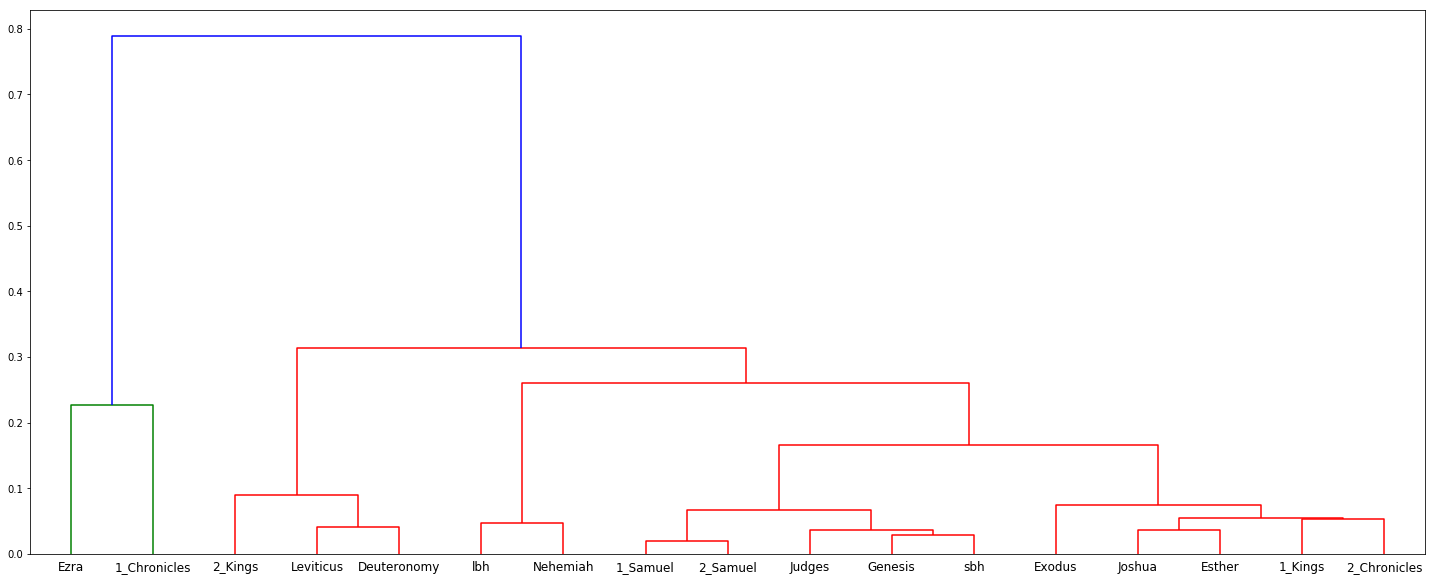

In [186]:
Z = linkage(np.matrix(df_Score_PF.values),  "ward")
plt.figure(figsize=(25, 10))
dendrogram(Z, labels = list(data.keys()))
plt.show()

# Phrase types

In [210]:
data = all_data['phrase_types']
unique_functions = unique(otype='phrase', feature='typ') 

In [211]:
data["sbh"]
unique_functions

['VP',
 'PP',
 'CP',
 'NP',
 'PrNP',
 'NegP',
 'AdvP',
 'PPrP',
 'InjP',
 'AdjP',
 'InrP',
 'IPrP',
 'DPrP']

In [212]:
phrase_types_count = dict() # Looking at all functions

for bookname, clauses in data.items():
    phrase_types_count[bookname] = collections.Counter(list(chain(*clauses))) 

df_Count = pd.DataFrame(phrase_types_count, columns=data.keys()).fillna(0)
# Normalize the dataframes. This means that we divide all frequencies by the sum of the frequencies. 
df_prob_Count = df_Count.div(df_Count.sum(axis=0), axis=1)

In [213]:
df_Count

,Genesis,sbh,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Samuel,2_Samuel,1_Kings,2_Kings,Esther,lbh,Ezra,Nehemiah,1_Chronicles,2_Chronicles
AdjP,45,212,21.0,0.0,1.0,10.0,18,32.0,26.0,32.0,27.0,14.0,67,3.0,10,7.0,33.0
AdvP,225,923,81.0,13.0,23.0,88.0,98,115.0,108.0,88.0,84.0,10.0,188,15.0,26,53.0,84.0
CP,2819,14071,1293.0,233.0,386.0,1113.0,1536,1879.0,1477.0,1628.0,1707.0,341.0,3819,216.0,580,901.0,1781.0
DPrP,30,91,9.0,6.0,1.0,23.0,1,1.0,7.0,13.0,0.0,0.0,45,6.0,6,26.0,7.0
IPrP,1,5,2.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,2.0,4,0.0,2,0.0,0.0
InjP,43,145,12.0,1.0,2.0,4.0,18,20.0,12.0,16.0,17.0,0.0,19,0.0,1,2.0,16.0
InrP,2,18,0.0,0.0,1.0,0.0,2,0.0,0.0,8.0,5.0,3.0,7,0.0,1,1.0,2.0
NP,1195,6005,744.0,51.0,114.0,500.0,676,706.0,589.0,837.0,593.0,179.0,2420,281.0,421,584.0,955.0
NegP,60,539,60.0,1.0,37.0,49.0,67,65.0,40.0,75.0,85.0,16.0,166,8.0,40,21.0,81.0
PP,2188,12043,1266.0,285.0,444.0,1138.0,1315,1392.0,1167.0,1449.0,1399.0,387.0,3993,254.0,575,974.0,1803.0


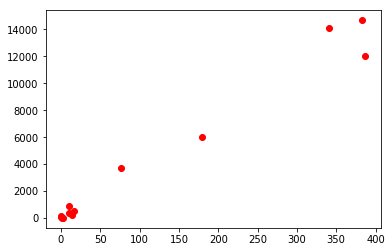

In [214]:
plt.plot(df_Count["Esther"].values,df_Count["sbh"].values, 'ro')
plt.show()

In [215]:
df_MSE_PF = pd.DataFrame(np.zeros((len(data.keys()), len(data.keys()))), columns = data.keys(), index = data.keys())
df_Score_PF = pd.DataFrame(np.zeros((len(data.keys()), len(data.keys()))), columns = data.keys(), index = data.keys())

for indexi,i in enumerate(data.keys()):
    for indexj,j in enumerate(data.keys()):
        x = np.matrix(df_Count[i].values).transpose()
        y = np.array(df_Count[j].values)
        
        regr = linear_model.LinearRegression(fit_intercept = True)
        regr.fit(x,y)
        y_pred = regr.predict(x)
        mse = mean_squared_error(y_pred, y)
        df_MSE_PF.loc[i,j] = round(mse,1)
        df_Score_PF.loc[i,j] = 1-regr.score(x,y)
        #plt.figure()
        ##plt.plot(x,y, 'ro')
        #plt.plot(x, y_pred, color='blue', linewidth=3)
        #plt.show()
               

In [216]:
df_Score_PF

,Genesis,sbh,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Samuel,2_Samuel,1_Kings,2_Kings,Esther,lbh,Ezra,Nehemiah,1_Chronicles,2_Chronicles
Genesis,0.000000,0.002994,0.022014,0.077344,0.050581,0.027933,0.008546,0.003561,0.001067,0.012341,0.007403,0.039950,0.040329,0.224900,0.060282,0.074334,0.026814
sbh,0.002994,0.000000,0.012320,0.059689,0.033422,0.014689,0.003491,0.008955,0.003316,0.005968,0.005271,0.022415,0.026860,0.212109,0.047751,0.061855,0.013815
Exodus,0.022014,0.012320,0.000000,0.076286,0.046606,0.010948,0.011820,0.036289,0.024351,0.004228,0.029096,0.009463,0.003254,0.135404,0.015510,0.034457,0.002424
Leviticus,0.077344,0.059689,0.076286,0.000000,0.013533,0.038061,0.073633,0.075581,0.066685,0.081738,0.061955,0.049855,0.086455,0.334943,0.143601,0.094610,0.068234
Deuteronomy,0.050581,0.033422,0.046606,0.013533,0.000000,0.025735,0.037815,0.055352,0.044739,0.045541,0.030529,0.024691,0.059395,0.291659,0.098289,0.095141,0.036730
Joshua,0.027933,0.014689,0.010948,0.038061,0.025735,0.000000,0.019413,0.036119,0.025289,0.016925,0.029641,0.010892,0.014467,0.190455,0.043708,0.030545,0.010255
Judges,0.008546,0.003491,0.011820,0.073633,0.037815,0.019413,0.000000,0.020117,0.011753,0.002639,0.006101,0.019994,0.025530,0.201976,0.036878,0.075166,0.009750
1_Samuel,0.003561,0.008955,0.036289,0.075581,0.055352,0.036119,0.020117,0.000000,0.001652,0.026029,0.012194,0.055566,0.057225,0.258681,0.085079,0.080973,0.043110
2_Samuel,0.001067,0.003316,0.024351,0.066685,0.044739,0.025289,0.011753,0.001652,0.000000,0.016110,0.007929,0.040270,0.042816,0.237151,0.068562,0.070481,0.029373
1_Kings,0.012341,0.005968,0.004228,0.081738,0.045541,0.016925,0.002639,0.026029,0.016110,0.000000,0.014855,0.014855,0.013324,0.163983,0.021682,0.057846,0.004468


C:\Users\etien\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


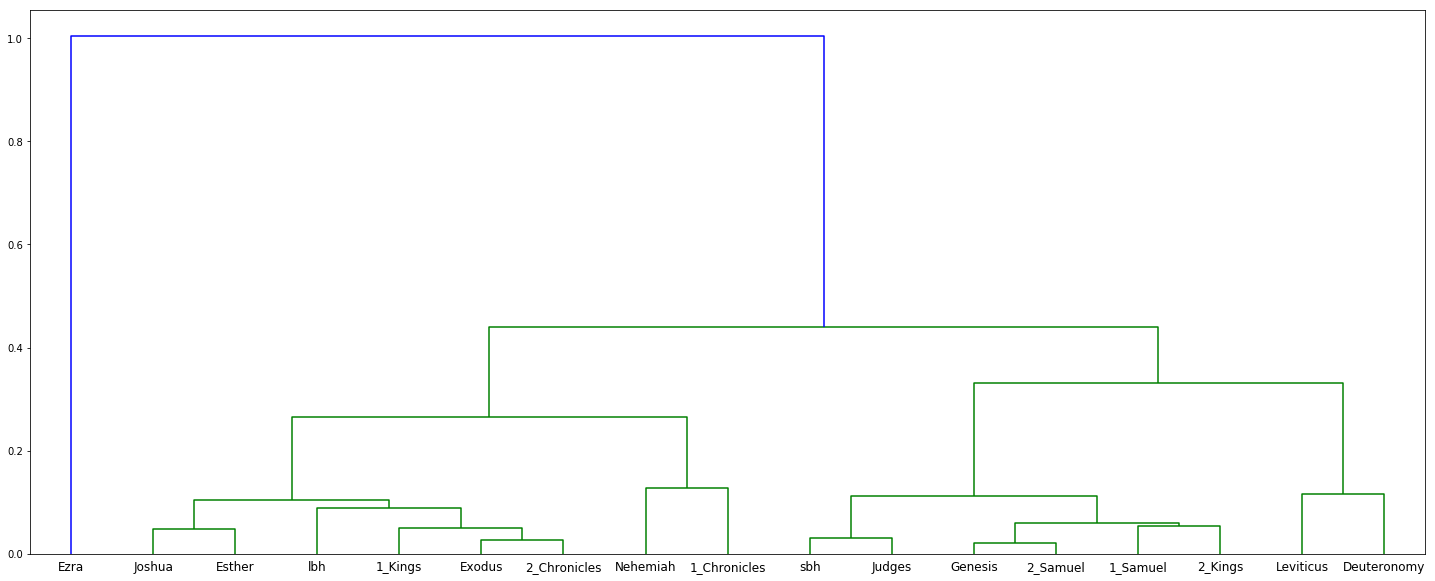

In [217]:
Z = linkage(np.matrix(df_Score_PF.values),  "ward")
plt.figure(figsize=(25, 10))
dendrogram(Z, labels = list(data.keys()))
plt.show()

# Clause type


In [220]:
data = all_data['clause_types']
unique_functions = unique(otype='clause', feature='typ') 

In [222]:
data["sbh"]

[['xQtX',
  'WXQt',
  'NmCl',
  'Ptcp',
  'WayX',
  'ZYqX',
  'WayX',
  'WayX',
  'xQt0',
  'WayX',
  'WayX',
  'WxQ0',
  'WayX',
  'WayX',
  'NmCl',
  'WayX',
  'ZYqX',
  'WYq0',
  'WayX',
  'Way0',
  'NmCl',
  'NmCl',
  'Way0',
  'WayX',
  'WayX',
  'WayX',
  'NmCl',
  'WayX',
  'ZYqX',
  'WYqX',
  'Way0',
  'WayX',
  'WxQ0',
  'WayX',
  'xQt0',
  'WayX',
  'ZYqX',
  'Ptcp',
  'Ptcp',
  'NmCl',
  'Way0',
  'WayX',
  'Ptcp',
  'Ptcp',
  'NmCl',
  'WayX',
  'xQt0',
  'WayX',
  'WayX',
  'NmCl',
  'WayX',
  'ZYqX',
  'InfC',
  'WQt0',
  'WQt0',
  'InfC',
  'Way0',
  'WayX',
  'WayX',
  'InfC',
  'InfC',
  'InfC',
  'WayX',
  'xQt0',
  'WayX',
  'WayX',
  'NmCl',
  'WayX',
  'ZYqX',
  'WXYq',
  'WayX',
  'AjCl',
  'Ptcp',
  'xQtX',
  'Ellp',
  'WayX',
  'xQt0',
  'WayX',
  'InfC',
  'ZIm0',
  'WIm0',
  'WIm0',
  'WXYq',
  'WayX',
  'WayX',
  'NmCl',
  'WayX',
  'ZYqX',
  'Ellp',
  'Way0',
  'WayX',
  'Ellp',
  'Ellp',
  'WayX',
  'xQt0',
  'WayX',
  'ZYq0',
  'WYq0',
  'Ptcp',
  'WayX',


In [223]:
phrase_types_count = dict() # Looking at all functions

for bookname, clauses in data.items():
    phrase_types_count[bookname] = collections.Counter(list(chain(*clauses))) 

df_Count = pd.DataFrame(phrase_types_count, columns=data.keys()).fillna(0)
# Normalize the dataframes. This means that we divide all frequencies by the sum of the frequencies. 
df_prob_Count = df_Count.div(df_Count.sum(axis=0), axis=1)

In [224]:
df_Count

,Genesis,sbh,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Samuel,2_Samuel,1_Kings,2_Kings,Esther,lbh,Ezra,Nehemiah,1_Chronicles,2_Chronicles
AjCl,82.0,551.0,38.0,67.0,73.0,13.0,45.0,68.0,60.0,57.0,48.0,23.0,117.0,11.0,23.0,19.0,41.0
CPen,94.0,549.0,46.0,133.0,55.0,33.0,23.0,30.0,33.0,55.0,47.0,5.0,89.0,14.0,13.0,18.0,39.0
Ellp,118.0,818.0,190.0,69.0,95.0,84.0,31.0,38.0,70.0,78.0,45.0,31.0,533.0,46.0,145.0,185.0,126.0
InfA,3.0,66.0,7.0,3.0,16.0,12.0,2.0,10.0,3.0,2.0,8.0,14.0,33.0,1.0,7.0,4.0,7.0
InfC,435.0,3035.0,341.0,196.0,451.0,209.0,222.0,330.0,274.0,318.0,259.0,109.0,900.0,97.0,96.0,183.0,415.0
MSyn,33.0,280.0,32.0,3.0,29.0,19.0,26.0,47.0,30.0,29.0,32.0,0.0,64.0,12.0,6.0,19.0,27.0
NmCl,730.0,4041.0,498.0,423.0,295.0,353.0,261.0,420.0,344.0,416.0,301.0,74.0,1687.0,224.0,192.0,853.0,344.0
Ptcp,251.0,1854.0,184.0,149.0,286.0,89.0,136.0,221.0,143.0,210.0,185.0,66.0,632.0,67.0,137.0,128.0,234.0
Reop,1.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Voct,53.0,276.0,14.0,0.0,21.0,6.0,32.0,36.0,47.0,35.0,32.0,3.0,82.0,7.0,10.0,31.0,31.0


In [237]:
df_Cor_PF = pd.DataFrame(np.zeros((len(data.keys()), len(data.keys()))), columns = data.keys(), index = data.keys())

for indexi,i in enumerate(data.keys()):
    for indexj,j in enumerate(data.keys()):
        df_Cor_PF.loc[i,j] = 1-pearsonr(df_Count[i].values,df_Count[j].values)[0]
df_Cor_PF

,Genesis,sbh,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Samuel,2_Samuel,1_Kings,2_Kings,Esther,lbh,Ezra,Nehemiah,1_Chronicles,2_Chronicles
Genesis,0.000000,0.033411,0.164261,0.602061,0.537279,0.061397,0.014899,0.025894,0.015161,0.021640,0.041562,0.194164,0.131613,0.372342,0.201550,0.321811,0.056157
sbh,0.033411,0.000000,0.061209,0.406239,0.335625,0.036152,0.060743,0.035624,0.039863,0.020090,0.075947,0.160835,0.116077,0.309538,0.184976,0.307899,0.060551
Exodus,0.164261,0.061209,0.000000,0.206525,0.186672,0.097257,0.216902,0.143494,0.163673,0.134610,0.238848,0.247161,0.185394,0.298503,0.251795,0.316876,0.195330
Leviticus,0.602061,0.406239,0.206525,0.000000,0.128887,0.442779,0.688157,0.570690,0.611719,0.536254,0.685826,0.609292,0.506571,0.414064,0.568739,0.501238,0.626664
Deuteronomy,0.537279,0.335625,0.186672,0.128887,0.000000,0.402112,0.594441,0.494891,0.531199,0.431046,0.563853,0.416709,0.462629,0.436658,0.485880,0.602277,0.467420
Joshua,0.061397,0.036152,0.097257,0.442779,0.402112,0.000000,0.112972,0.069912,0.064123,0.039895,0.118891,0.142908,0.054490,0.201660,0.151945,0.186598,0.071969
Judges,0.014899,0.060743,0.216902,0.688157,0.594441,0.112972,0.000000,0.035674,0.026735,0.040301,0.027760,0.224431,0.197543,0.480962,0.247371,0.431998,0.060408
1_Samuel,0.025894,0.035624,0.143494,0.570690,0.494891,0.069912,0.035674,0.000000,0.007001,0.044493,0.088799,0.143996,0.153634,0.393745,0.253806,0.342760,0.076570
2_Samuel,0.015161,0.039863,0.163673,0.611719,0.531199,0.064123,0.026735,0.007001,0.000000,0.037046,0.075773,0.137031,0.132067,0.376244,0.224971,0.322001,0.058603
1_Kings,0.021640,0.020090,0.134610,0.536254,0.431046,0.039895,0.040301,0.044493,0.037046,0.000000,0.037262,0.150601,0.096737,0.306710,0.149893,0.306403,0.027040


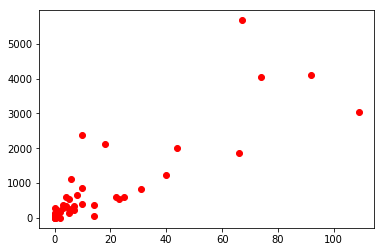

In [225]:
plt.plot(df_Count["Esther"].values,df_Count["sbh"].values, 'ro')
plt.show()

In [243]:
df_MSE_PF = pd.DataFrame(np.zeros((len(data.keys()), len(data.keys()))), columns = data.keys(), index = data.keys())
df_Score_PF = pd.DataFrame(np.zeros((len(data.keys()), len(data.keys()))), columns = data.keys(), index = data.keys())

for indexi,i in enumerate(data.keys()):
    for indexj,j in enumerate(data.keys()):
        x = np.matrix(df_Count[i].values).transpose()
        y = np.array(df_Count[j].values)
        
        regr = linear_model.LinearRegression(fit_intercept = True)
        regr.fit(x,y)
        y_pred = regr.predict(x)
        mse = mean_squared_error(y_pred, y)
        df_MSE_PF.loc[i,j] = round(mse,1)
        df_Score_PF.loc[i,j] = 1-regr.score(x,y)
        #plt.figure()
        ##plt.plot(x,y, 'ro')
        #plt.plot(x, y_pred, color='blue', linewidth=3)
        #plt.show()
               

In [244]:
df_Score_PF

,Genesis,sbh,Exodus,Leviticus,Deuteronomy,Joshua,Judges,1_Samuel,2_Samuel,1_Kings,2_Kings,Esther,lbh,Ezra,Nehemiah,1_Chronicles,2_Chronicles
Genesis,0.000000,0.065705,0.301541,0.841644,0.785889,0.119025,0.029575,0.051117,0.030093,0.042812,0.081396,0.350628,0.245904,0.606045,0.362477,0.540060,0.109161
sbh,0.065705,0.000000,0.118671,0.647448,0.558605,0.070997,0.117797,0.069978,0.078138,0.039775,0.146126,0.295803,0.218680,0.523263,0.335736,0.520996,0.117436
Exodus,0.301541,0.118671,0.000000,0.370397,0.338498,0.185056,0.386758,0.266398,0.300556,0.251101,0.420647,0.433234,0.336417,0.507902,0.440190,0.533342,0.352506
Leviticus,0.841644,0.647448,0.370397,0.000000,0.241162,0.689504,0.902754,0.815693,0.849238,0.784939,0.901294,0.847348,0.756528,0.656679,0.814014,0.751236,0.860620
Deuteronomy,0.785889,0.558605,0.338498,0.241162,0.000000,0.642530,0.835522,0.744865,0.780225,0.676291,0.809776,0.659772,0.711233,0.682646,0.735681,0.841817,0.716358
Joshua,0.119025,0.070997,0.185056,0.689504,0.642530,0.000000,0.213181,0.134936,0.124134,0.078199,0.223647,0.265393,0.106010,0.362654,0.280803,0.338378,0.138759
Judges,0.029575,0.117797,0.386758,0.902754,0.835522,0.213181,0.000000,0.070076,0.052754,0.078978,0.054750,0.398492,0.356063,0.730600,0.433550,0.677374,0.117166
1_Samuel,0.051117,0.069978,0.266398,0.815693,0.744865,0.134936,0.070076,0.000000,0.013954,0.087006,0.169713,0.267257,0.283664,0.632455,0.443194,0.568035,0.147277
2_Samuel,0.030093,0.078138,0.300556,0.849238,0.780225,0.124134,0.052754,0.013954,0.000000,0.072719,0.145804,0.255285,0.246693,0.610928,0.399330,0.540318,0.113773
1_Kings,0.042812,0.039775,0.251101,0.784939,0.676291,0.078199,0.078978,0.087006,0.072719,0.000000,0.073135,0.278521,0.184116,0.519349,0.277318,0.518923,0.053350


C:\Users\etien\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


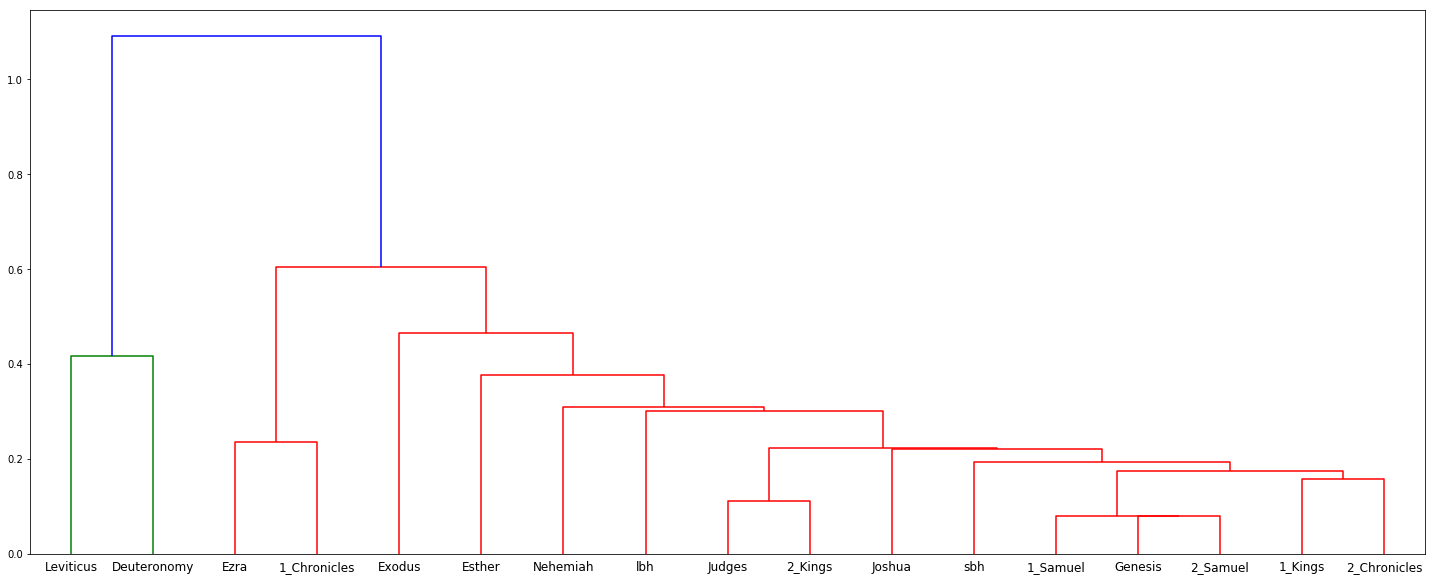

In [247]:
Z = linkage(np.matrix(df_Cor_PF.values),  "single")
plt.figure(figsize=(25, 10))
dendrogram(Z, labels = list(data.keys()))
plt.show()